In [1]:
import pandas as pd

# Load the dataset,
data = pd.read_csv("/content/bank-additional-full.csv", sep = ';')
display(data.head()) # Display the very first few rows of the dataset.

# Read the metadata file,
with open('/content/bank-additional-names.txt', 'r') as file:
    column_descriptions = file.readlines()

# Display the very first few lines of the metadata,
print("\nColumn Descriptions:")
with open('bank-additional-names.txt', 'r') as file:
    for line in file:
        print(line.strip())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



Column Descriptions:
﻿Citation Request:
This dataset is publicly available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014

3. Past Usage:

The full dataset (bank-additional-full.csv) was described and analyzed in:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

4. Relevant Information:

This dataset is based

In [2]:
# Get a summary of the dataset,
print("\nDataset Summary:")
print(data.info())

# Check for missing values,
print("\nMissing Values:")
print(data.isnull().sum())

# Check for duplicate values,
print("\nDuplicate Values:")
print(data.duplicated().sum())

# Statistical summary,
print("\nStatistical Summary:")
print(data.describe())



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx

In [3]:
# Identify Target Variable
target_column = 'y'
if target_column in data.columns:
    print(f"\nTarget Variable ('{target_column}') Distribution:")
    print(data[target_column].value_counts())
else:
    print(f"Target column '{target_column}' not found in dataset.")

# Identify Categorical and Numerical Features
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Features:")
print(list(categorical_features))

print("\nNumerical Features:")
print(list(numerical_features))

# Unique Values in Sample Categorical Column
sample_categorical = 'job'
if sample_categorical in data.columns:
    print(f"\nUnique Values in '{sample_categorical}':")
    print(data[sample_categorical].unique())

# Detailed Statistics of Sample Numerical Column
sample_numerical = 'age'
if sample_numerical in data.columns:
    print(f"\nStatistics for '{sample_numerical}':")
    print(data[sample_numerical].describe())


Target Variable ('y') Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Categorical Features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

Numerical Features:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Unique Values in 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Statistics for 'age':
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [4]:
#Pre Processing
from scipy.stats import zscore # Import zscore

# Import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling Missing Values

# Fill missing numerical values with the mean
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())
# Fill missing categorical values with "Unknown"
data[categorical_features] = data[categorical_features].fillna("Unknown")

# Encoding Categorical Features - One-Hot Encoding
data_onehot = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Label Encoding (for ordinal features)
data_label = data.copy()
for col in categorical_features:
    label_encoder = LabelEncoder()
    data_label[col] = label_encoder.fit_transform(data_label[col])

# Handling Outliers (using Z-score)
z_scores = zscore(data[numerical_features])
data = data[(z_scores < 3).all(axis=1)]  # Remove rows with Z-score > 3

# Feature Scaling
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Save preprocessed data to a new CSV file
data.to_csv('preprocessed.csv', index=False) # index=False prevents saving row index


<ipython-input-4-04e33cce6c02>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [5]:
# Print some info to check preprocessing:
print("\nPreprocessed Data:")
print(data.head())  # Print the first few rows

print("\nData Info after Preprocessing:")
print(data.info())  # Check data types and missing values

print("\nDescriptive Statistics after Preprocessing:")
print(data.describe())  # Check for scaling and outlier removal effect

# Print specific columns to check encoding:
print("\nEncoded Categorical Feature (e.g., job):")
print(data['job'].head())  # data_label['job'] for label encoding

print("\nOne-Hot Encoded Features (first few rows):")
print(data_onehot.iloc[:5, -10:])  # Print last 10 one-hot encoded columns


Preprocessed Data:
        age        job  marital    education  default housing loan    contact  \
0  1.683885  housemaid  married     basic.4y       no      no   no  telephone   
1  1.787008   services  married  high.school  unknown      no   no  telephone   
2 -0.275441   services  married  high.school       no     yes   no  telephone   
3  0.033926     admin.  married     basic.6y       no      no   no  telephone   
4  1.683885   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign     pdays  previous     poutcome  \
0   may         mon  ... -0.742588  0.147243 -0.360191  nonexistent   
1   may         mon  ... -0.742588  0.147243 -0.360191  nonexistent   
2   may         mon  ... -0.742588  0.147243 -0.360191  nonexistent   
3   may         mon  ... -0.742588  0.147243 -0.360191  nonexistent   
4   may         mon  ... -0.742588  0.147243 -0.360191  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.emplo

In [6]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Assuming 'y' is the target variable column
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# X_train: Training features
# X_test: Testing features
# y_train: Training target variable
# y_test: Testing target variable

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)


Shape of training data: (30498, 20)
Shape of testing data: (7625, 20)


In [7]:
# Check target variable balance
target_distribution = y.value_counts()
print("\nTarget Variable Distribution:")
print(target_distribution)

class_proportions = target_distribution / len(y)
print("\nClass Proportions:")
print(class_proportions)

imbalance_threshold = 0.1
is_balanced = (class_proportions.min() > imbalance_threshold)

if is_balanced:
    print("\nThe target variable is balanced.")
else:
    print("\nThe target variable is imbalanced.")


Target Variable Distribution:
y
no     34680
yes     3443
Name: count, dtype: int64

Class Proportions:
y
no     0.909687
yes    0.090313
Name: count, dtype: float64

The target variable is imbalanced.


In [8]:
!pip install imblearn

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to both training and testing data
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Align the columns of X_test_encoded to match X_train_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Ensure SMOTE is applied only to the training data after encoding
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# Check the balance of the target variable after balancing
print("\nTarget Variable Distribution After Balancing:")
print(y_train_balanced.value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Target Variable Distribution After Balancing:
y
no     27796
yes    27796
Name: count, dtype: int64


In [10]:
# Random Forest Model
import pandas as pd
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to both training and testing data
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Align the columns of X_test_encoded to match X_train_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Ensure SMOTE is applied only to the training data after encoding
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
joblib.dump(rf_model, 'rf_model.pkl')  # Save after training

# Make Predictions on the test data
y_pred = rf_model.predict(X_test_encoded)

# Evaluate the model performance
print("\nRandom Forest Model Performance:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Random Forest Model Performance:
Accuracy: 0.9191

Classification Report:
              precision    recall  f1-score   support

          no       0.96      0.95      0.95      6884
         yes       0.58      0.63      0.60       741

    accuracy                           0.92      7625
   macro avg       0.77      0.79      0.78      7625
weighted avg       0.92      0.92      0.92      7625


Confusion Matrix:
[[6544  340]
 [ 277  464]]


In [11]:
# Neural Network Model
import numpy as np
import random
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-Hot Encoding Categorical Features
categorical_features = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the training and test data
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Align the columns of X_test_encoded to match X_train_encoded (in case some columns are missing)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# One-Hot Encoding the Target Variable
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Convert data to NumPy arrays (for TensorFlow compatibility)
X_train_encoded = X_train_encoded.values
X_test_encoded = X_test_encoded.values
y_train_encoded = y_train_encoded.values
y_test_encoded = y_test_encoded.values

# Convert data to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train_encoded, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_encoded, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train_encoded, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test_encoded, dtype=tf.float32)

# Define the Neural Network Model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_tensor.shape[1],)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(y_train_tensor.shape[1], activation='softmax')  # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and Train the Model
model = create_model()

# Train the model and display epochs progress
history = model.fit(X_train_tensor, y_train_tensor,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test_tensor, y_test_tensor),
                    verbose=1)  # Set to 1 for epoch progress

#Save the model
model.save('nn_model.h5')  # Save after training

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor, verbose=1)

# Print the Accuracy
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


954/954 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9043 - loss: 0.2283 - val_accuracy: 0.9201 - val_loss: 0.1742
Epoch 2/20
954/954 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9208 - loss: 0.1726 - val_accuracy: 0.9178 - val_loss: 0.1720
Epoch 3/20
954/954 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9223 - loss: 0.1681 - val_accuracy: 0.9205 - val_loss: 0.1705
Epoch 4/20
954/954 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9250 - loss: 0.1656 - val_accuracy: 0.9231 - val_loss: 0.1687
Epoch 5/20
954/954 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9253 - loss: 0.1636 - val_accuracy: 0.9218 - val_loss: 0.1677
Epoch 6/20
954/954 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9251 - loss: 0.1616 - val_accuracy: 0.9209 - val_loss: 0.1690
Epoch 7/20
954/954 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9268 - loss: 0.1607 - val_accuracy: 0.9226 - val_loss: 0.1679
Epoch 8/20
954/954 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9273 - loss: 0.1576 - val_accuracy: 0.9230 - val_

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9213 - loss: 0.1735

Test Accuracy: 0.9197


Random Forest model loaded successfully.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Neural Network model loaded successfully.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

--- Model Comparison ---
Metric		Random Forest	Neural Network
Accuracy		0.9191		0.9197
Precision		0.5771		0.6675
Recall			0.6262		0.3468
F1-score		0.6006		0.4565
ROC-AUC			0.9417		0.9437



Visualization of accuracies on each model:


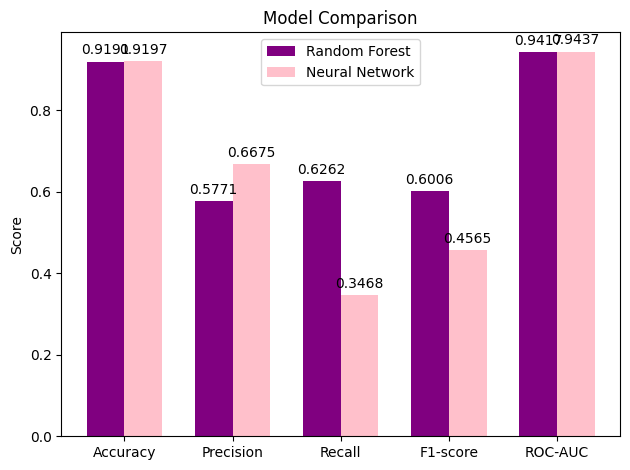

In [12]:
#Comparing two models

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder

# Reloading Random Forest Model
try:
    rf_model = joblib.load('rf_model.pkl')  # Reloading the Random Forest model
    print("Random Forest model loaded successfully.")
except FileNotFoundError:
    print("Random Forest model not found. Please ensure it was trained and saved.")

# Reloading Neural Network Model
try:
    nn_model = tf.keras.models.load_model('nn_model.h5')  # Reloading the Neural Network model
    print("Neural Network model loaded successfully.")
except IOError:
    print("Neural Network model not found. Please ensure it was trained and saved.")

# Preprocessing Data
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)  # Converts 'no' to 0 and 'yes' to 1

# Evaluate the Random Forest Model
if 'rf_model' in locals():
    # Ensure X_test_encoded matches the trained model's features
    try:
        y_pred_rf = rf_model.predict(X_test_encoded)
        y_pred_rf_numeric = le.transform(y_pred_rf)
        rf_probabilities = rf_model.predict_proba(X_test_encoded)

        # Random Forest Metrics
        rf_accuracy = accuracy_score(y_test_numeric, y_pred_rf_numeric)
        rf_precision = precision_score(y_test_numeric, y_pred_rf_numeric)
        rf_recall = recall_score(y_test_numeric, y_pred_rf_numeric)
        rf_f1 = f1_score(y_test_numeric, y_pred_rf_numeric)
        rf_roc_auc = roc_auc_score(y_test_numeric, rf_probabilities[:, 1])
    except Exception as e:
        print(f"Error during Random Forest evaluation: {e}")

# Evaluate the Neural Network Model
if 'nn_model' in locals():
    try:
        y_pred_nn = nn_model.predict(X_test_tensor)
        y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

        # Neural Network Metrics
        nn_accuracy = accuracy_score(y_test_numeric, y_pred_nn_classes)
        nn_precision = precision_score(y_test_numeric, y_pred_nn_classes)
        nn_recall = recall_score(y_test_numeric, y_pred_nn_classes)
        nn_f1 = f1_score(y_test_numeric, y_pred_nn_classes)
        nn_roc_auc = roc_auc_score(y_test_numeric, y_pred_nn[:, 1])
    except Exception as e:
        print(f"Error during Neural Network evaluation: {e}")

# Print the Comparison Table

print("\n--- Model Comparison ---")
print("Metric\t\tRandom Forest\tNeural Network")
if 'rf_model' in locals():
    print(f"Accuracy\t\t{rf_accuracy:.4f}\t\t", end='')
if 'nn_model' in locals():
    print(f"{nn_accuracy:.4f}")
if 'rf_model' in locals():
    print(f"Precision\t\t{rf_precision:.4f}\t\t", end='')
if 'nn_model' in locals():
    print(f"{nn_precision:.4f}")
if 'rf_model' in locals():
    print(f"Recall\t\t\t{rf_recall:.4f}\t\t", end='')
if 'nn_model' in locals():
    print(f"{nn_recall:.4f}")
if 'rf_model' in locals():
    print(f"F1-score\t\t{rf_f1:.4f}\t\t", end='')
if 'nn_model' in locals():
    print(f"{nn_f1:.4f}")
if 'rf_model' in locals():
    print(f"ROC-AUC\t\t\t{rf_roc_auc:.4f}\t\t", end='')
if 'nn_model' in locals():
    print(f"{nn_roc_auc:.4f}")

# Plotting the Bar Graph for Comparison
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc] if 'rf_model' in locals() else []
nn_metrics = [nn_accuracy, nn_precision, nn_recall, nn_f1, nn_roc_auc] if 'nn_model' in locals() else []
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']

x = np.arange(len(metric_labels))
width = 0.35

fig, ax = plt.subplots()
if rf_metrics:
    rects1 = ax.bar(x - width/2, rf_metrics, width, label='Random Forest', color='purple')
if nn_metrics:
    rects2 = ax.bar(x + width/2, nn_metrics, width, label='Neural Network', color='pink')

ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metric_labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

print("\n\n\nVisualization of accuracies on each model:")

if rf_metrics:
    autolabel(rects1)
if nn_metrics:
    autolabel(rects2)

fig.tight_layout()
plt.show()
